In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("edmonton_housing_data_Feb15_2022.csv")

In [3]:
df.columns

Index(['House Description', 'Price', 'Bedrooms', 'Bathrooms', 'Full Baths',
       'Square Footage', 'Acres', 'Year Built', 'Type', 'Sub-Type', 'Style',
       'Address', 'Area', 'Community', 'Condo', 'City', 'County', 'Province',
       'Postal Code', 'Features', 'Parking Spaces', 'Parking', 'Is Waterfront',
       'Has Pool', 'Interior', 'Interior Features', 'Heating', 'Fireplace',
       '# of Stories', 'Has Basement', 'Basement', 'Separate Entrance',
       'Exterior', 'Exterior Features', 'Construction', 'Foundation',
       'Elementary', 'Middle', 'High', 'Foreclosure', 'RE / Bank Owned',
       'Office', 'Bedrooms Above Grade', '# of Garages', 'Garages',
       'Half Baths', 'Fireplaces', 'Zoning', 'Lot Description', 'HOA Fees',
       'HOA Fees Freq.', 'Condo Fee'],
      dtype='object')

In [4]:
df.drop(['House Description', 'Full Baths', 'Condo', 'County', 'Features', 'Parking', 'Is Waterfront',
       'Has Pool', 'Interior', 'Interior Features', 'Heating', 'Fireplace',
       '# of Stories', 'Has Basement', 'Basement', 'Separate Entrance',
       'Exterior', 'Exterior Features', 'Construction', 'Foundation',
       'Elementary', 'Middle', 'High', 'Foreclosure', 'RE / Bank Owned',
       'Office', 'Bedrooms Above Grade', '# of Garages', 'Garages',
       'Half Baths', 'Fireplaces', 'Zoning', 'Lot Description', 'HOA Fees',
       'HOA Fees Freq.', 'Condo Fee'], axis = 1, inplace = True)

In [5]:
df[df['Area'] != df['City']]

,Price,Bedrooms,Bathrooms,Square Footage,Acres,Year Built,Type,Sub-Type,Style,Address,Area,Community,City,Province,Postal Code,Parking Spaces


In [6]:
df.drop('Area', axis = 1, inplace = True)

In [7]:
df['Parking Spaces'] = df['Parking Spaces'].fillna(0)

In [8]:
df['Province'] = df['Province'].replace('AB','Alberta')

In [9]:
df = df.replace({
    'Price' : '[,$]',
    'Square Footage' : ','},
                '', regex = True)

In [10]:
# Change the data types of the specified columns
df = df.astype({'Price': float, 'Square Footage': float, 'Acres': float,
              'Bedrooms': int, 'Bathrooms': int, 'Year Built': int})

In [11]:
df['Description'] = df['Bedrooms'].astype(str) + " Bedrooms " + df['Bathrooms'].astype(str) + " Bathrooms " + df['Style']
df.insert(0, 'Description', df.pop('Description'))

In [12]:
df

,Description,Price,Bedrooms,Bathrooms,Square Footage,Acres,Year Built,Type,Sub-Type,Style,Address,Community,City,Province,Postal Code,Parking Spaces
0,1 Bedrooms 1 Bathrooms Bungalow,399990.0,1,1,787.0,0.12,1948,Single Family,Residential Detached Single Family,Bungalow,15915 100a Avenue Nw,Glenwood,Edmonton,Alberta,T5P 0L7,8.0
1,4 Bedrooms 2 Bathrooms Bungalow,357000.0,4,2,929.0,0.15,1954,Single Family,Residential Detached Single Family,Bungalow,11540 140 Street Nw,Woodcroft,Edmonton,Alberta,T5M 1S7,0.0
2,5 Bedrooms 2 Bathrooms Bungalow,499600.0,5,2,1161.0,0.14,1959,Single Family,Residential Detached Single Family,Bungalow,10431 68 Avenue Nw,Allendale,Edmonton,Alberta,T6H 2A8,2.0
3,4 Bedrooms 3 Bathrooms Bungalow,398800.0,4,3,1217.0,0.15,1976,Single Family,Residential Detached Single Family,Bungalow,12112 146 Avenue Nw,Caernarvon,Edmonton,Alberta,T5X 1V3,6.0
4,3 Bedrooms 2 Bathrooms Bungalow,279900.0,3,2,1160.0,0.00,1979,Single Family,Residential Detached Single Family,Bungalow,11945 52 Street Nw,Newton,Edmonton,Alberta,T5W 3J5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,6 Bedrooms 2 Bathrooms Bungalow,399900.0,6,2,1227.0,0.17,1960,Single Family,Duplex Up And Down,Bungalow,12939 12941 102 Street Nw,Lauderdale,Edmonton,Alberta,T5E 4J4,0.0
1693,6 Bedrooms 6 Bathrooms 2 Storey Split,2795000.0,6,6,4593.0,0.13,2004,Condo / Townhouse,Duplex Up And Down,2 Storey Split,10521/10519 Saskatchewan Drive Nw Nw,Strathcona,Edmonton,Alberta,T6E 4S1,0.0
1694,6 Bedrooms 2 Bathrooms 2 and Half Storey,239900.0,6,2,1783.0,0.00,1917,Single Family,Duplex Up And Down,2 and Half Storey,11503 95a Street Nw,Alberta Avenue,Edmonton,Alberta,T5G 1P6,0.0
1695,4 Bedrooms 9 Bathrooms 2 Storey,839900.0,4,9,3445.0,0.05,2017,Condo / Townhouse,Tri-Plex,2 Storey,11949 58 Street Nw,Newton,Edmonton,Alberta,T5W 3X1,0.0


In [13]:
result = df.groupby('Bedrooms')['Price'].mean().reset_index()

# Rename the 'Value' column to 'Average' (optional)
result = result.rename(columns={'Price': 'Average'})

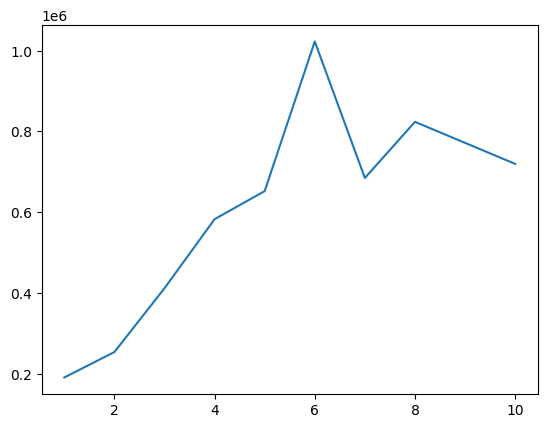

In [14]:
plt.plot(result['Bedrooms'],result['Average'])

In [15]:
result

,Bedrooms,Average
0,1,1.911962e+05
1,2,2.540679e+05
2,3,4.118846e+05
3,4,5.828212e+05
4,5,6.522777e+05
5,6,1.022421e+06
6,7,6.847500e+05
7,8,8.235920e+05
8,10,7.196000e+05


In [16]:
df2 = result.iloc[0:5]

In [17]:
df2['Highest'] = df2['Average'].max()

C:\Users\Fahim\AppData\Local\Temp\ipykernel_17196\3430027821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Highest'] = df2['Average'].max()


In [18]:
df2 = df2.drop("Average", axis=1)

In [19]:
df2

,Bedrooms,Highest
0,1,652277.71831
1,2,652277.71831
2,3,652277.71831
3,4,652277.71831
4,5,652277.71831


In [20]:
df3 = result.iloc[5:9]

In [21]:
df3

,Bedrooms,Average
5,6,1.022421e+06
6,7,6.847500e+05
7,8,8.235920e+05
8,10,7.196000e+05


In [22]:
df3.loc[len(df3)] = [11, df3["Average"].mean()]
df3 = df3.reset_index(drop=True)

C:\Users\Fahim\AppData\Local\Temp\ipykernel_17196\3275966755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[len(df3)] = [11, df3["Average"].mean()]


In [23]:
df3

,Bedrooms,Average
0,6.0,1.022421e+06
1,7.0,6.847500e+05
2,8.0,8.235920e+05
3,10.0,7.196000e+05
4,11.0,8.125906e+05


In [24]:
df3.Bedrooms.dtype

dtype('float64')

In [25]:
df3.Bedrooms = df3.Bedrooms.astype(int)

In [26]:
df2

,Bedrooms,Highest
0,1,652277.71831
1,2,652277.71831
2,3,652277.71831
3,4,652277.71831
4,5,652277.71831


In [27]:
df3

,Bedrooms,Average
0,6,1.022421e+06
1,7,6.847500e+05
2,8,8.235920e+05
3,10,7.196000e+05
4,11,8.125906e+05


In [28]:
df4 = pd.concat([df2,df3], axis=1)

In [29]:
df4

,Bedrooms,Highest,Bedrooms,Average
0,1,652277.71831,6,1.022421e+06
1,2,652277.71831,7,6.847500e+05
2,3,652277.71831,8,8.235920e+05
3,4,652277.71831,10,7.196000e+05
4,5,652277.71831,11,8.125906e+05


In [30]:
df5 = pd.DataFrame({'event': [1, 2, 3, 4, 5], 'rain': ['yes', 'no', 'no', 'yes', 'no']})

In [31]:
df5

,event,rain
0,1,yes
1,2,no
2,3,no
3,4,yes
4,5,no


In [32]:
df6 = pd.concat([df4,df5], axis=1)

In [33]:
df6.drop("Bedrooms", axis=1, inplace = True)

In [34]:
df6

,Highest,Average,event,rain
0,652277.71831,1.022421e+06,1,yes
1,652277.71831,6.847500e+05,2,no
2,652277.71831,8.235920e+05,3,no
3,652277.71831,7.196000e+05,4,yes
4,652277.71831,8.125906e+05,5,no


In [35]:
new = df6.groupby("rain")["event"].mean().reset_index()

In [36]:
xpos = np.arange(len(new['rain']))

In [37]:
new

,rain,event
0,no,3.333333
1,yes,2.500000


In [38]:
humidity = [2.1,1.2]

In [39]:
temp1 = new.iloc[0]
temp2 = new.iloc[1]
new.iloc[0] = temp2
new.iloc[1] = temp1

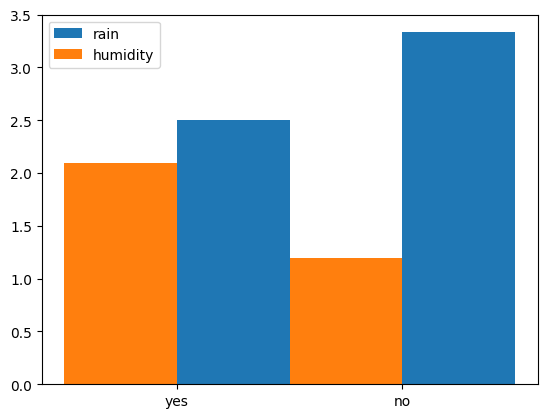

In [40]:
plt.xticks(xpos,new['rain'])
plt.bar(xpos+0.25,new['event'], width = 0.5, label = 'rain')
plt.bar(xpos-0.25,humidity, width = 0.5, label = 'humidity')
plt.legend()

In [56]:
new = df6.groupby("rain")

In [59]:
new['event'].max()

rain
no     5
yes    4
Name: event, dtype: int64